# Simple Visualization of Datasets
This notebook contains an example of what the data looks. And for each dataset, shows the distribution for how similar each mention is to the actual link text. Where a mention is a part of text that refers to something (in this case a Wikipedia page), and the link text is for Wikipedia.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [3]:
# get data for each set
data = {}
data['kore'] = []
for line in open('kore.json', 'r'):
    data['kore'].append(json.loads(line))
data['aquaint'] = []
for line in open('aquaint.txt.json', 'r'):
    data['aquaint'].append(json.loads(line))
data['msnbc'] = []
for line in open('msnbc.txt.json', 'r'):
    data['msnbc'].append(json.loads(line))
data['wiki'] = []
for line in open('wiki-mentions.5000.json', 'r'):
    data['wiki'].append(json.loads(line))

In [4]:
print(data['kore'][0]) # show what data looks like

{'text': ['David', 'and', 'Victoria', 'named', 'their', 'children', 'Brooklyn', ',', 'Romeo', ',', 'Cruz', ',', 'and', 'Harper Seven', '.'], 'mentions': [[0, 'David_Beckham'], [2, 'Victoria_Beckham']]}


In [5]:
# holds similarities between text and link
sims = {}
sims['kore'] = []
for line in data['kore']:
    for mention in line['mentions']:
        sims['kore'].append(similar(line['text'][mention[0]],mention[1]))
        
sims['aquaint'] = []
for line in data['aquaint']:
    for mention in line['mentions']:
        sims['aquaint'].append(similar(line['text'][mention[0]],mention[1]))
        
sims['msnbc'] = []
for line in data['msnbc']:
    for mention in line['mentions']:
        sims['msnbc'].append(similar(line['text'][mention[0]],mention[1]))
        
sims['wiki'] = []
for line in data['wiki']:
    for mention in line['mentions']:
        sims['wiki'].append(similar(line['text'][mention[0]],mention[1]))

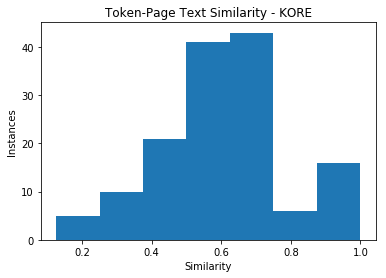

In [6]:
plt.hist(sims['kore'], bins=int(len(sims['kore'])/20))
plt.title('Token-Page Text Similarity - KORE')
plt.xlabel('Similarity')
plt.ylabel('Instances')
plt.show()

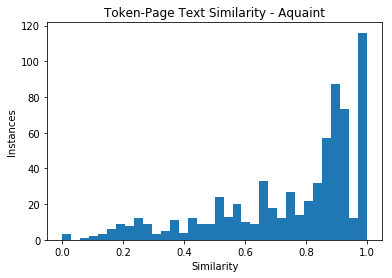

In [7]:
plt.hist(sims['aquaint'], bins=int(len(sims['aquaint'])/20))
plt.title('Token-Page Text Similarity - Aquaint')
plt.xlabel('Similarity')
plt.ylabel('Instances')
plt.show()

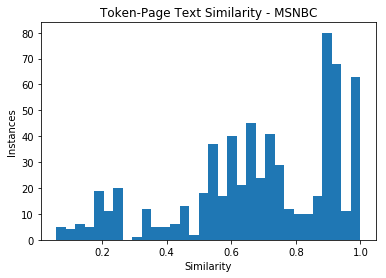

In [8]:
plt.hist(sims['msnbc'], bins=int(len(sims['msnbc'])/20))
plt.title('Token-Page Text Similarity - MSNBC')
plt.xlabel('Similarity')
plt.ylabel('Instances')
plt.show()

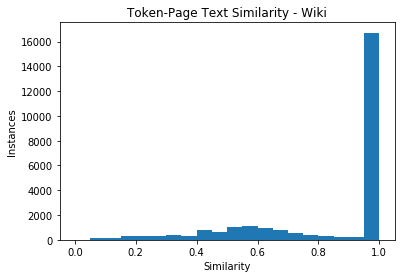

In [9]:
plt.hist(sims['wiki'], bins=20)
plt.title('Token-Page Text Similarity - Wiki')
plt.xlabel('Similarity')
plt.ylabel('Instances')
plt.show()